In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.isnull().values.any()
data.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['Date'] = pd.to_datetime(data['Timestamp'],unit='s').dt.date
group = data.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [4]:
df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [5]:
df.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


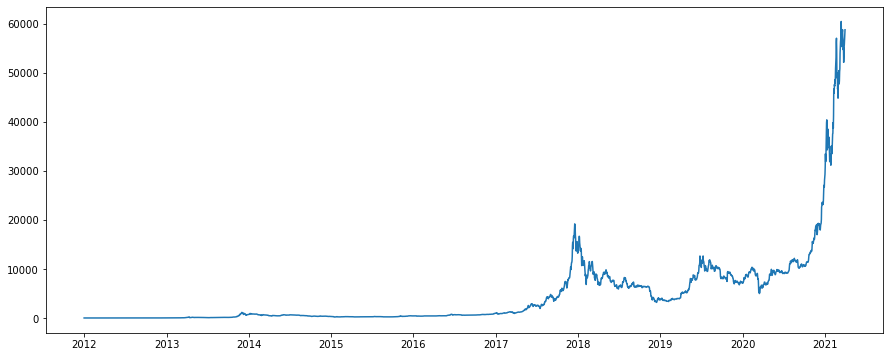

In [6]:
plt.plot(df)

In [7]:
data=df
forecast_out = int(20)
df['Prediction'] = data[['Close']].shift(-forecast_out)
X = np.array(data.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(data['Prediction'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
cross_validation = forest_reg.predict(X_test)
confidence = forest_reg.score(X_test, y_test)
print("confidence: ", confidence)
forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

Random Forest R squared": 0.9565
confidence:  0.9564975772575192
[58472.43780957 58472.43780957 58472.43780957 58472.43780957
 59275.96401532 57541.78567805 58472.43780957 58472.43780957
 58472.43780957 58472.43780957 58472.43780957 59159.55419519
 59159.55419519 55491.59765821 56764.35694514 59275.96401532
 57591.38297596 58472.43780957 58472.43780957 58472.43780957]


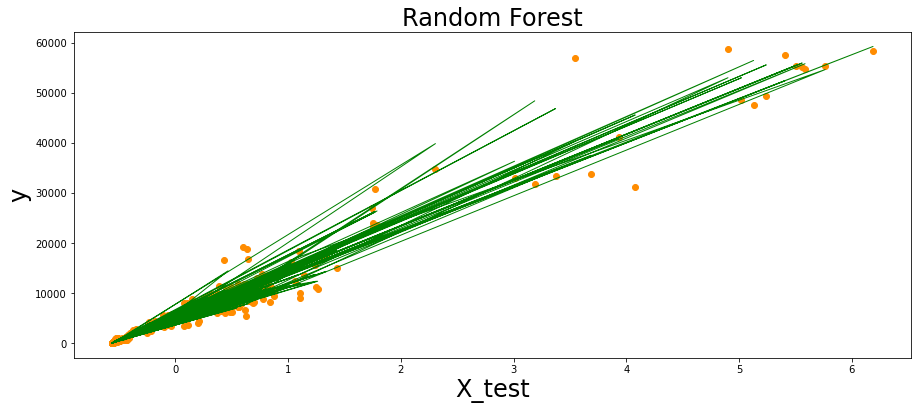

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Random Forest",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

1780.0206599900098


In [10]:
last_date = df.iloc[-1].name
print(last_date)

2021-03-31


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
data1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
data1 =data1.set_index('Date')
data1.info()
print(data.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.471603    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.208159    6.495556


Text(0, 0.5, '$(Dollar)')

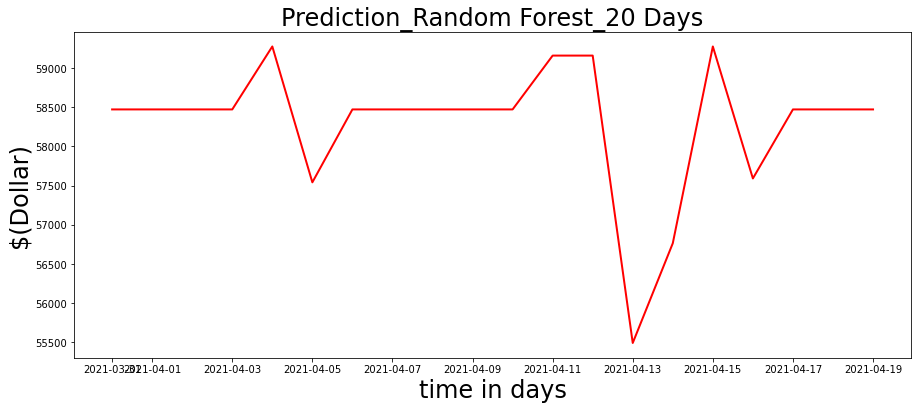

In [12]:
plt.plot(data1,color='red', lw=2)
plt.title("Prediction_Random Forest_20 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

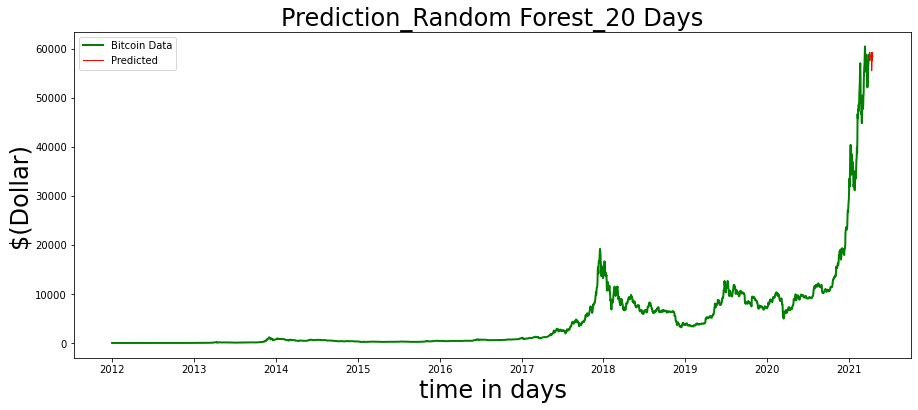

In [13]:
plt.plot(data['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(data1['Close'],label='Predicted',color='red', lw=1)
plt.title("Prediction_Random Forest_20 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')